# Loading and Cleaning Datasets

In [1]:
import pandas as pd
import numpy as np
import spacy as sp
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

If using IDE, Run 
```
python -m spacy download en_core_web_sm
```
in the bash to install the english spacy pipline

## Official Datasets

### Data and Exploration

In [131]:
df = pd.read_json("../Datasets/Official/train.json")
df

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."
...,...,...,...,...,...
6802,22678,EXAMPLE – JOURNEY MAP\n\nTHE CHALLENGE My w...,"[EXAMPLE, –, JOURNEY, MAP, \n\n, THE, CHALLENG...","[True, True, True, False, False, True, True, F...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6803,22679,Why Mind Mapping?\n\nMind maps are graphical r...,"[Why, Mind, Mapping, ?, \n\n, Mind, maps, are,...","[True, True, False, False, False, True, True, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6804,22681,"Challenge\n\nSo, a few months back, I had chos...","[Challenge, \n\n, So, ,, a, few, months, back,...","[False, False, False, True, True, True, True, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6805,22684,Brainstorming\n\nChallenge & Selection\n\nBrai...,"[Brainstorming, \n\n, Challenge, &, Selection,...","[False, False, True, True, False, False, True,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [132]:
df[df.isnull().any(axis = 1)]

,document,full_text,tokens,trailing_whitespace,labels


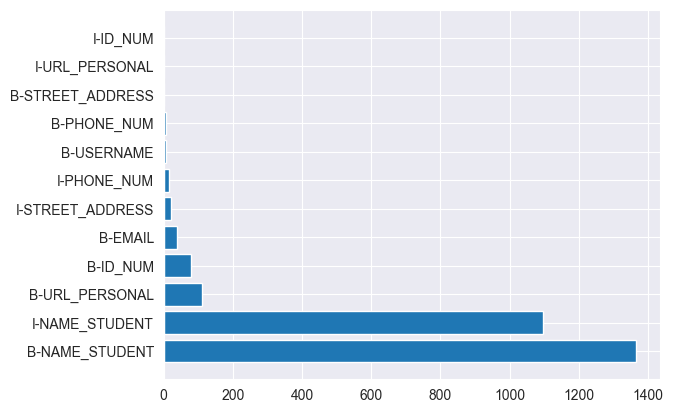

In [133]:
from collections import Counter
c = Counter()
df.apply(lambda line: c.update(line.labels), axis = 1)
c_pii = c.most_common()[1:]
c_key, c_val = zip(*c_pii)
plt.barh(c_key, c_val)
plt.show()

figure how to do without tokenizer

In [ ]:
# token_counts = []
# for _, row in df_train.iterrows():
#     token_count = len(tokenizer.encode(
#         row["full_text"],
#         max_length=2048,
#         truncation=True
#     ))
#     token_counts.append(token_count)
# sns.histplot(token_counts)
# # plt.xlim([0, 512]);

### Preprocessing

In [155]:
pattern = '(\xa0|\uf0b7)'
df.loc[:,'full_text'] = df.loc[:,'full_text'].replace(pattern, ' ')
df.loc[:,'tokens'] = df.loc[:,'tokens'].apply(lambda line: [tok for tok in line if not re.search(pattern,tok)])

df_usable = df.iloc[df[~(df.tokens.apply(len) != df.labels.apply(len))].index]
1-(len(df_usable))/len(df.document)

0.043043925370941705

In [164]:
df_train, df_test = train_test_split(df_usable, test_size=0.05)

In [163]:
def labelling(line):
    line_labels = pd.Series(line.labels)
    labels_index = line_labels[line_labels != 'O'].index
    return {index: (line_labels.loc[index], pd.Series(line.tokens).loc[index]) for index in labels_index.to_list()}

df_usable['label_dict'] = df_usable.apply(lambda line: isolate_kword(line), axis = 1)
df_usable

,document,full_text,tokens,trailing_whitespace,labels,label_dict
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","{9: ('B-NAME_STUDENT', 'Nathalie'), 10: ('I-NA..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","{0: ('B-NAME_STUDENT', 'Diego'), 1: ('I-NAME_S..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...","{4: ('B-NAME_STUDENT', 'Gilberto'), 5: ('I-NAM..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...","{5: ('B-NAME_STUDENT', 'Sindy'), 6: ('I-NAME_S..."
5,86,Cheese Startup - Learning Launch ​by Eladio Am...,"[Cheese, Startup, -, Learning, Launch, ​by, El...","[True, True, True, True, True, True, True, Fal...","[O, O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUD...","{6: ('B-NAME_STUDENT', 'Eladio'), 7: ('I-NAME_..."
...,...,...,...,...,...,...
6802,22678,EXAMPLE – JOURNEY MAP\n\nTHE CHALLENGE My w...,"[EXAMPLE, –, JOURNEY, MAP, \n\n, THE, CHALLENG...","[True, True, True, False, False, True, True, F...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",{}
6803,22679,Why Mind Mapping?\n\nMind maps are graphical r...,"[Why, Mind, Mapping, ?, \n\n, Mind, maps, are,...","[True, True, False, False, False, True, True, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",{}
6804,22681,"Challenge\n\nSo, a few months back, I had chos...","[Challenge, \n\n, So, ,, a, few, months, back,...","[False, False, False, True, True, True, True, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",{}
6805,22684,Brainstorming\n\nChallenge & Selection\n\nBrai...,"[Brainstorming, \n\n, Challenge, &, Selection,...","[False, False, True, True, False, False, True,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",{}


In [167]:
labels_to_ids = {k: v for v, k in enumerate(c.keys())}
ids_to_labels = {v: k for v, k in enumerate(c.keys())}
labels_to_ids

{'O': 0,
 'B-NAME_STUDENT': 1,
 'I-NAME_STUDENT': 2,
 'B-URL_PERSONAL': 3,
 'B-EMAIL': 4,
 'B-ID_NUM': 5,
 'I-URL_PERSONAL': 6,
 'B-USERNAME': 7,
 'B-PHONE_NUM': 8,
 'I-PHONE_NUM': 9,
 'B-STREET_ADDRESS': 10,
 'I-STREET_ADDRESS': 11,
 'I-ID_NUM': 12}

# Model


In [10]:
import os

from transformers import BertForTokenClassification
from nltk.tokenize import sent_tokenize
from transformers import BertTokenizer, AutoTokenizer
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import transformers
from sklearn.model_selection import train_test_split

from tqdm import tqdm

import glob

import datetime

import warnings
warnings.filterwarnings('ignore')

In [169]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizerFast, BertConfig, BertForTokenClassification

from sklearn.model_selection import train_test_split

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [188]:
# platform = 'Kaggle'
platform = 'local'
model_name = 'model1_bert_base_cased.bin'

if platform == 'Kaggle':
    bert_path = '../input/huggingface-bert/bert-base-cased/'
    train_path = '/kaggle/input/coleridgeinitiative-show-us-the-data/train/'
    test_path = '/kaggle/input/coleridgeinitiative-show-us-the-data/test/*'
    model_path = '../input/coleridgemodels/' + model_name
elif platform == 'local':
    bert_path = 'bert-base-cased'
    model_path = '../models/bert_models/' + model_name

config = {
        'MAX_LEN': 128,
        'tokenizer': BertTokenizer.from_pretrained(bert_path),
        'TRAIN_BATCH_SIZE': 4,
        'VALID_BATCH_SIZE': 2,
        'EPOCHS': 1,
        'LEARNING_RATE':1e-05,
        'MAX_GRAD_NORM': 10,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'model_name':model_name
        }


In [189]:
class dataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __getitem__(self, index):
        # step 1: get the sentence and word labels 
        sentence = self.data.tokens
        word_labels = self.data.labels

        # step 2: use tokenizer to encode sentence (includes padding/truncation up to max length)
        # BertTokenizerFast provides a handy "return_offsets_mapping" functionality for individual tokens
        # encoding = self.tokenizer(sentence,
        #                           is_pretokenized=True,
        #                           return_offsets_mapping=True,
        #                           padding='max_length',
        #                           truncation=True,
        #                           max_length=self.max_len)

        # step 3: create token labels only for first word pieces of each tokenized word
        labels = [labels_to_ids[label] for label in word_labels]
        # code based on https://huggingface.co/transformers/custom_datasets.html#tok-ner
        # create an empty array of -100 of length max_length
        encoded_labels = np.ones(len(encoding["offset_mapping"]), dtype=int) * -100

        # set only labels whose first offset position is 0 and the second is not 0
        i = 0
        for idx, mapping in enumerate(encoding["offset_mapping"]):
            if mapping[0] == 0 and mapping[1] != 0:
                # overwrite label
                encoded_labels[idx] = labels[i]
                i += 1

        # step 4: turn everything into PyTorch tensors
        item = {key: torch.as_tensor(val) for key, val in encoding.items()}
        item['labels'] = torch.as_tensor(encoded_labels)

        return item

    def __len__(self):
        return self.len

In [192]:
df_train

,document,full_text,tokens,trailing_whitespace,labels,label_dict
4407,17298,Challenge & Selection\n\nThe challenge was a d...,"[Challenge, &, Selection, \n\n, The, challenge...","[True, True, False, False, True, True, True, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",{}
569,8752,Challenge and selection\n\nThe principal appar...,"[Challenge, and, selection, \n\n, The, princip...","[True, True, False, False, True, True, True, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",{}
6009,20991,1. Challenge\n\nThe challenge was to convince ...,"[1, ., Challenge, \n\n, The, challenge, was, t...","[False, True, False, False, True, True, True, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",{}
3783,15748,Reflection – Mind Mapping\n\nChallenge\n\nMy c...,"[Reflection, –, Mind, Mapping, \n\n, Challenge...","[True, True, True, False, False, False, False,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",{}
2587,12886,Storytelling and changes Challenge & Select...,"[Storytelling, and, changes, , Challenge, &...","[True, True, True, False, True, True, False, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",{}
...,...,...,...,...,...,...
4815,18270,Coursera:​ ​ ​Design​ ​Thinking​ ​for​ ​Innova...,"[Coursera:​, ​, ​Design​, ​Thinking​, ​for​, ​...","[True, True, True, True, True, True, False, Tr...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",{}
1053,9752,Childhood Woes – Storytelling\n\nChallenge & S...,"[Childhood, Woes, –, Storytelling, \n\n, Chall...","[True, True, True, False, False, True, True, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",{}
250,5116,Perle Kamdem Design Thinking – Retirement Coa...,"[Perle, Kamdem, , Design, Thinking, –, Retire...","[True, True, False, True, True, True, True, Tr...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","{0: ('B-NAME_STUDENT', 'Perle'), 1: ('I-NAME_S..."
1999,11659,Example Reflection – Learning Launch\n\nChalle...,"[Example, Reflection, –, Learning, Launch, \n\...","[True, True, True, True, False, False, False, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",{}


In [190]:
training_set = dataset(df_train, config['tokenizer'], config['MAX_LEN'])
testing_set = dataset(df_test, config['tokenizer'], config['MAX_LEN'])

In [191]:
training_set[0]

ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).